In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_rot_matrix(angle):
    cos_ = np.cos(angle)
    sin_ = np.sin(angle)
    return np.array([[cos_, -sin_],[sin_, cos_]])

def rotate(img, rot_mat):
    # assert(rot_mat.shape[1] == img.shape[0])
    rotated = np.matmul(rot_mat,img)
    if not rotated:
        print(f"img not present")
    cv2.imshow("rotated", rotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
# Rotation using opencv
def rotate_(img_path):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    cx,cy = w//2, h//2
    rot_mat = cv2.getRotationMatrix2D((cx,cy),45.0,1.0)
    rotated = cv2.warpAffine(img,rot_mat,(w,h))
    translation_mat = np.array([[1,0,50],[0,1,30]],dtype=np.float32)

    rot_trans = cv2.warpAffine(rotated,translation_mat,(w,h))
    plt.imshow(rot_trans)
    plt.imshow(rotated)
    plt.show()



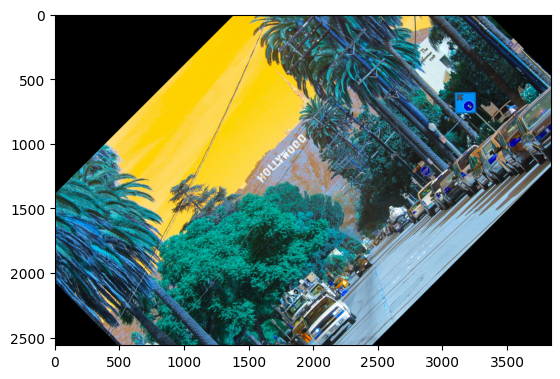

In [17]:
rotate_('../image.png')

Scale the image by 1.5 along x and 0.75 along y (non-uniform scaling).

Rotate it by 30° around its center.

Shear it along x-axis by 0.2 and y-axis by 0.1.

Translate it by (50, 30) pixels.

In [25]:
p = '../image.png'
img = cv2.imread(p)

# Scaling:
def warp(img:np.array):
    h,w = img.shape[:2]
    theta = np.deg2rad(30)
    cos_ = np.cos(theta)
    sin_ = np.sin(theta)

    scale_mat = np.array([[1.5,0,0],[0,0.75,0],[0,0,1]],dtype=np.float32)
    rot_mat = np.array([[cos_,-sin_,0],[sin_,cos_,0],[0,0,1]],dtype=np.float32)
    shear_mat = np.array([[1,0.1,0],[0.2,1,0],[0,0,1]],dtype=np.float32)
    trans_mat = np.array([[1,0,50],[0,1,30],[0,0,1]],dtype = np.float32)
    
    
    comb = trans_mat @ shear_mat @ rot_mat @ scale_mat
    comb = comb[:2,:]
    warped = cv2.warpAffine(img,comb,(w,h))
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
    plt.imshow(warped)
    plt.show()
    

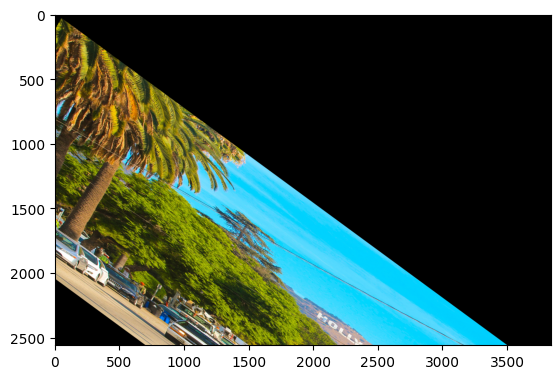

In [26]:
warp(img)